In [2]:
import pandas as pd
import numpy as np


In [5]:
# Read the data from a IBM website

df_canada = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# Adding a total column
df_canada['Total'] = df_canada.sum(axis=1)

/var/folders/wv/bb36gv1x4qd7nsd6slzk69v80000gn/T/ipykernel_67929/3835711918.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


In [9]:
df_canada.index

RangeIndex(start=0, stop=195, step=1)

In [11]:
#Renaming column names
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [12]:
# Setting the "Country" as the index
df_canada.set_index('Country', inplace= True)
df_canada.head(3)

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156


In [16]:
# Dropping unneeded columns
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.head(2)

KeyError: "['AREA', 'REG', 'DEV', 'Type', 'Coverage'] not found in axis"

## Generating Area Plots

In [17]:
df_canada.sort_values(['Total'], ascending= False, axis=0, inplace= True)

In [18]:
df_canada.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938


In [26]:
## Let's get the top 5

# The years we are interested in
years = list(range(1980, 2014))

# Let's sort the values
df_canada.sort_values(['Total'], ascending= False, axis= 0, inplace= True)

# Store the top 5
df_top5 = df_canada.head()

# Transpose into a new table (create a pivot table)
df_top5 = df_top5[years].transpose()

In [27]:
## Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

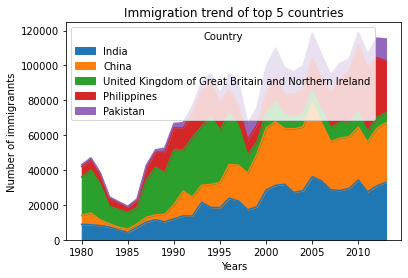

In [28]:
df_top5.plot(kind='area')

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrannts')
plt.xlabel('Years')

plt.show()